# Home task : KNN classification
1. `iris` dataset
    - load `iris` dataset
    - split to train and test
    - train KNN classifiers for different `K`
    - choose the best `K` determined on test set

2. synthetic dataset
    - generrate synthetic dataset
    - split to train and test
    - train KNN regressors for different `K`
    - choose the best `K` determined on test set
    - visualize the decision boundary 




## `Iris` dataset 

In [36]:
import pandas as pd 
import numpy as np 
np.random.seed = 2021
from sklearn.datasets import load_iris
iris = load_iris()
print ('data contains:',iris.keys())

X = iris.data
y = iris.target
X[:10, :]

data contains: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [37]:
from sklearn.utils import shuffle

X, y = shuffle(X, y)

print(X[:10, :], y[:10])


[[7.2 3.6 6.1 2.5]
 [6.7 3.1 4.7 1.5]
 [6.9 3.1 5.4 2.1]
 [6.  2.9 4.5 1.5]
 [6.2 3.4 5.4 2.3]
 [4.4 2.9 1.4 0.2]
 [6.  3.  4.8 1.8]
 [5.6 3.  4.1 1.3]
 [6.8 2.8 4.8 1.4]
 [7.2 3.  5.8 1.6]] [2 1 2 1 2 0 2 1 1 2]


In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

X[:10, :]

array([[ 1.64384411,  1.24920112,  1.33113254,  1.71209594],
       [ 1.03800476,  0.09821729,  0.53540856,  0.3957741 ],
       [ 1.2803405 ,  0.09821729,  0.93327055,  1.18556721],
       [ 0.18982966, -0.36217625,  0.42173371,  0.3957741 ],
       [ 0.4321654 ,  0.78880759,  0.93327055,  1.44883158],
       [-1.74885626, -0.36217625, -1.34022653, -1.3154443 ],
       [ 0.18982966, -0.13197948,  0.59224599,  0.79067065],
       [-0.29484182, -0.13197948,  0.194384  ,  0.13250973],
       [ 1.15917263, -0.59237301,  0.59224599,  0.26414192],
       [ 1.64384411, -0.13197948,  1.16062026,  0.52740629]])

In [39]:
k_best = 0 # 'compute the best k'
score_best = float(0) #'compute the best score'
print ('The best k = {} , score = {}'.format(k_best,score_best ))

The best k = 0 , score = 0.0


In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)
print(f'X Train shape {X_train.shape}')
print(f'X Test shape {X_test.shape}')
print(f'Y Train shape {y_train.shape}')
print(f'Y Test shape {y_test.shape}')

X Train shape (120, 4)
X Test shape (30, 4)
Y Train shape (120,)
Y Test shape (30,)


In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

MAX = 50

for K in range(1, MAX): 
    knn_c = KNeighborsClassifier(K) 
    knn_c.fit(X_train, y_train) 

    y_pred = knn_c.predict(X_test) 

    accuracy = float(metrics.accuracy_score(y_test, y_pred)) 
    if accuracy > score_best:
        k_best = K
        score_best = accuracy

print(f'Best K: {k_best}, accuracy: {score_best}')

Best K: 1, accuracy: 0.9666666666666667


## Synthetic dataset  

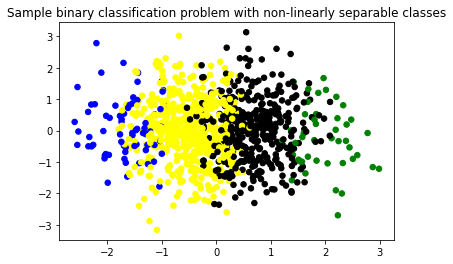

In [42]:
from sklearn.datasets import make_blobs, make_regression
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['blue','#FFFF00','black','green'])

np.random.seed= 2021
X_D2, y_D2 = make_regression(n_samples = 1000, n_features = 4, random_state = 4,n_informative=1, noise=14)
y_D2 = y_D2 
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=30, cmap=cmap_bold)
plt.show()




In [43]:
k_best = 0 # 'compute the best k'
score_best = 0 #'compute the best score'
print ('The best k = {} , score = {}'.format(k_best,score_best ))

The best k = 0 , score = 0


In [44]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_D2 = sc.fit_transform(X_D2)
X_D2[:10, :]

array([[-0.63478854, -0.82130099, -1.47534778, -1.21267325],
       [-0.42731301, -0.18672073, -0.35928544, -0.93488551],
       [-1.2290723 ,  0.42662411,  0.46507978, -0.48038617],
       [ 0.29033024, -0.1550057 , -1.00934782, -0.16083533],
       [ 0.94993646, -0.18840623,  0.17197849,  0.02229925],
       [-1.70815588,  0.82174298,  0.7486505 , -0.83465542],
       [ 1.01798906,  0.44218318,  0.57808742, -0.62549005],
       [-0.70691841,  0.26637414,  0.8779425 ,  0.67042075],
       [ 2.60645724, -0.55046838,  1.08965399, -1.14452372],
       [-1.58934776, -0.08306074, -0.22347108,  1.50465209]])

In [45]:
from sklearn.model_selection import train_test_split

X_train_D2, X_test_D2, y_train_D2, y_test_D2 = train_test_split(X_D2, y_D2, train_size=0.8, test_size=0.2)

print(f'X_D2 Train shape {X_train_D2.shape}')
print(f'X_D2 Test shape {X_test_D2.shape}')
print(f'y_D2 Train shape {y_train_D2.shape}')
print(f'y_D2 Test shape {y_test_D2.shape}')

X_D2 Train shape (800, 4)
X_D2 Test shape (200, 4)
y_D2 Train shape (800,)
y_D2 Test shape (200,)


In [33]:
from sklearn.neighbors import KNeighborsRegressor

MAX = 50

scores = []
for K in range(1, MAX): 
    knn_r = KNeighborsRegressor(K) 
    knn_r.fit(X_train_D2, y_train_D2)

    y_pred_D2 = knn_r.predict(X_test_D2)

    score = knn_r.score(X_test_D2, y_test_D2)
    scores.append(score)

    if score >  score_best :
        k_best = K
        score_best = score

print(f"Best K is {k_best}, score {score_best}")

Best K is 8, score 0.8441876504703153


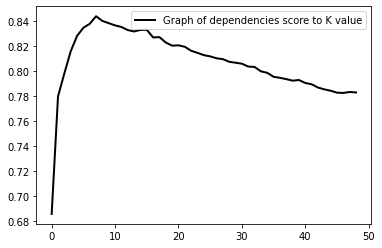

In [34]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(range(MAX-1), scores, lw=2, color="black", label='Graph of dependencies score to K value')
plt.legend()
